In [43]:
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
%matplotlib inline

In [10]:
CONGOV_LDA = 'tw_topicos_lda_15.txt.gz'
CONGOV_LSI = 'tw_topicos_lsi_15.txt.gz'

PROGOV_LDA = 'tw_topicos_lda_13.txt.gz'
PROGOV_LSI = 'tw_topicos_lsi_13.txt.gz'

# words extracted from top-3 of previous table
words = ['globogolpista','dia13diadeluta','domingoeunaovouporque','globoquergolpe',
         'foradilma','dilma','vemprarua','familiamarinhonohsbc','tchau']

In [20]:
def FreqTopicsWords(filename, words):
    Freq = defaultdict(int)
    FreqW = dict([(w,0) for w in words])
    f = gzip.open(filename)
    for l in f:
        topic = l.split(' $&% ')[-1].strip()
        tweet = l.split(' $&% ')[0].split(' >> ')[-1].strip()
        if '*' in topic:
            t  = '_'.join(map(lambda x: x.split('*')[1] ,topic.split('+')[:2]))
            Freq[t] += 1
        for w in words:
            if w in tweet:
                FreqW[w] += 1
    f.close()
    return Freq, FreqW

In [75]:
def PlotT(Freq, Name):
    x,y = zip(*(Freq.items()))
    x = np.array(x)
    y = np.array(y)
    idx = np.argsort(-y)[:10]
    x = x[idx]
    y = y[idx]
    PlotTW(x,y,Name, Name+'_topic.eps')

def PlotW(Freq, Name):
    x,y = zip(*(Freq.items()))
    x = np.array(x)
    y = np.array(y)
    PlotTW(x,y,Name, Name+'_words.eps')
    
def PlotTW( x, y, Name, Fname):
    sns.set(style="white", context="talk")
    rs = np.random.RandomState(7)
    plt.figure()
    ax = sns.barplot(np.array(['']*len(x)),y,x, ci=None, palette="Paired", hline=.1)
    plt.title(Name)    
    ax.set_ylabel("Frequency")
    sns.despine(bottom=True)    
    plt.savefig(Fname)

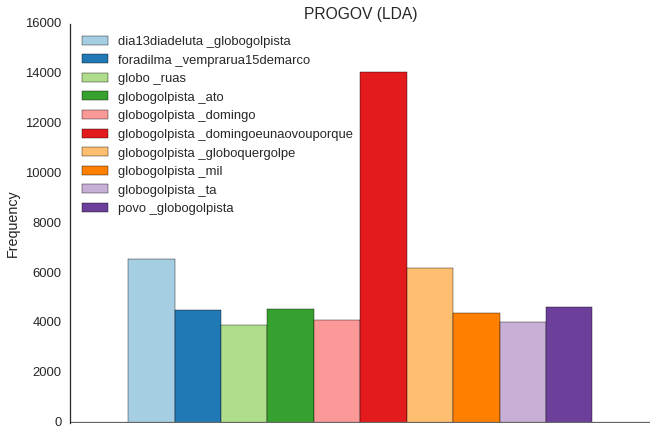

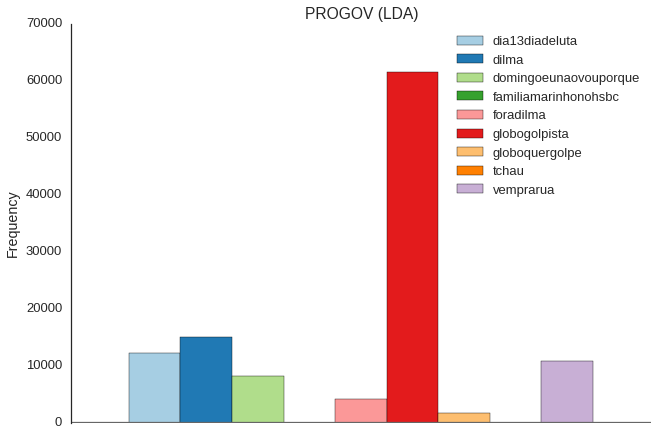

In [76]:
Freq, FreqW = FreqTopicsWords(PROGOV_LDA,words)
PlotT(Freq, 'PROGOV (LDA)')
PlotW(FreqW,'PROGOV (LDA)')

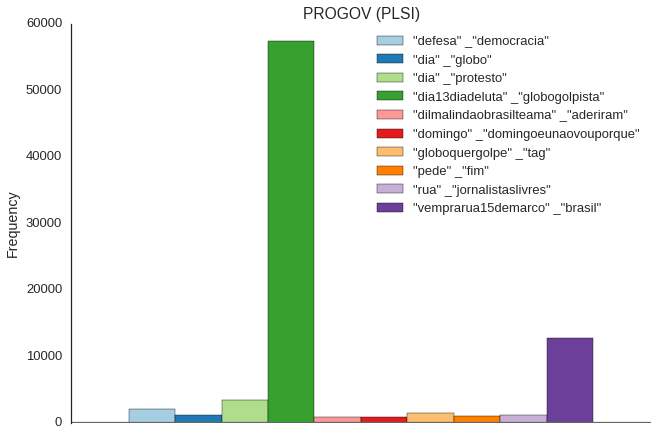

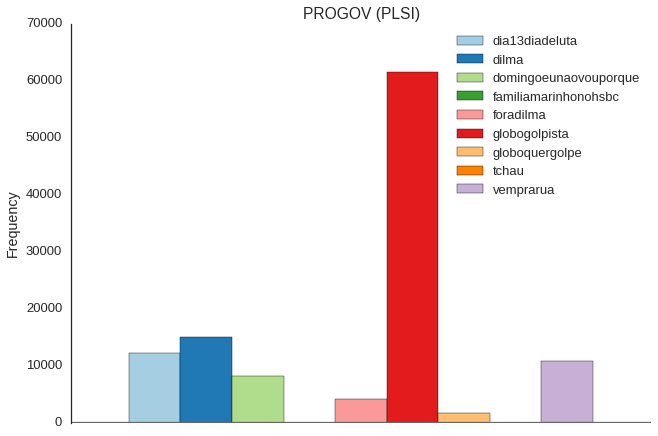

In [77]:
Freq, FreqW = FreqTopicsWords(PROGOV_LSI,words)
PlotT(Freq, 'PROGOV (PLSI)')
PlotW(FreqW,'PROGOV (PLSI)')

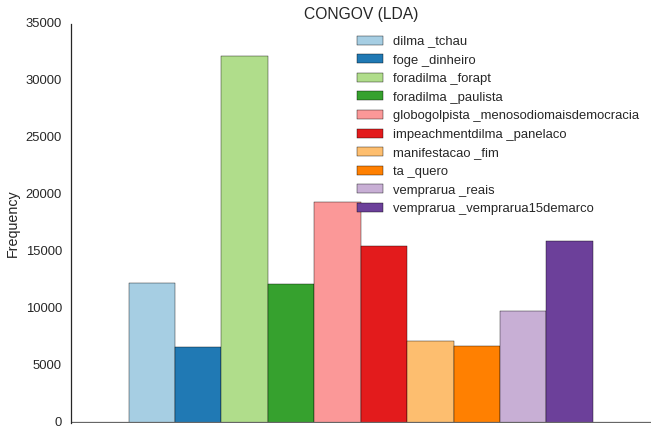

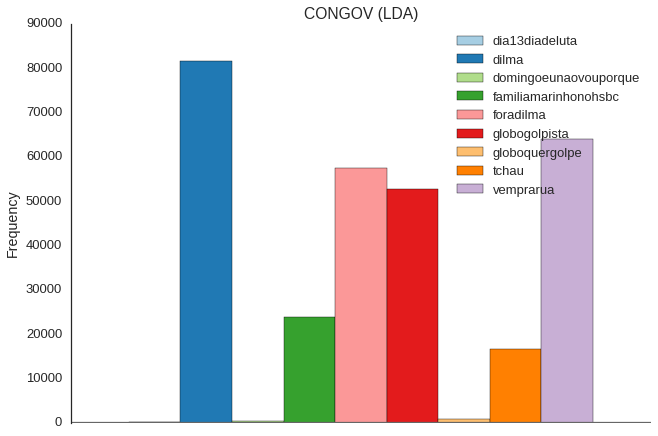

In [78]:
Freq, FreqW = FreqTopicsWords(CONGOV_LDA,words)
PlotT(Freq, 'CONGOV (LDA)')
PlotW(FreqW,'CONGOV (LDA)')

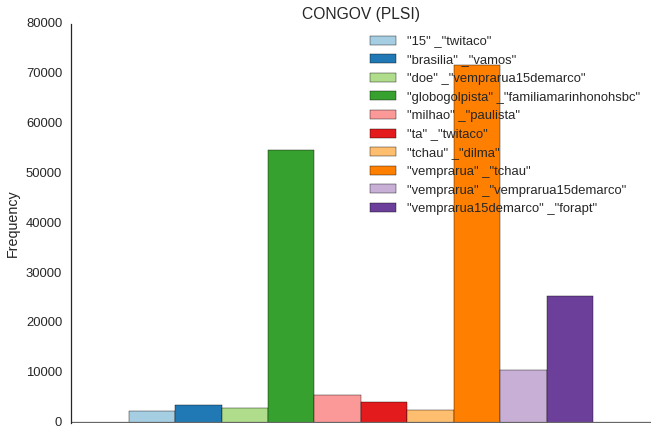

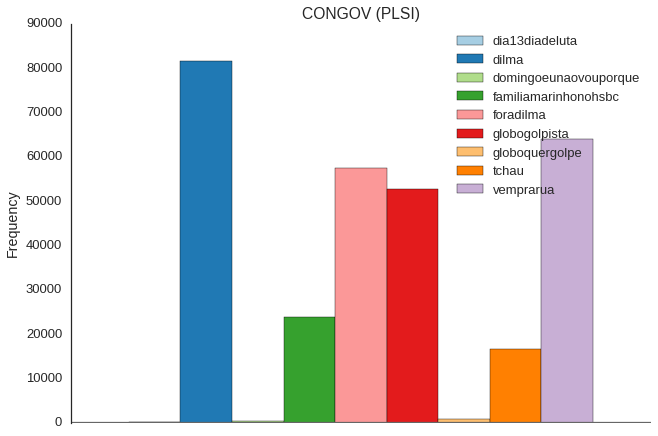

In [79]:
Freq, FreqW = FreqTopicsWords(CONGOV_LSI,words)
PlotT(Freq, 'CONGOV (PLSI)')
PlotW(FreqW,'CONGOV (PLSI)')